In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import time
import seaborn as sn

In [2]:
X_test = pd.read_csv('Dataset/X_test.csv')
y_test = pd.read_csv('Dataset/y_test.csv').iloc[:, 0]

X_train_30 = pd.read_csv('Dataset/X_train_30.csv')
y_train_30 = pd.read_csv('Dataset/y_train_30.csv').iloc[:, 0]

X_train_60 = pd.read_csv('Dataset/X_train_60.csv')
y_train_60 = pd.read_csv('Dataset/y_train_60.csv').iloc[:, 0]

X_train_100 = pd.read_csv('Dataset/X_train_100.csv')
y_train_100 = pd.read_csv('Dataset/y_train_100.csv').iloc[:, 0]

In [3]:
catboost_results = {}

In [4]:
start_time = time.time()

In [5]:
catboost_30 = CatBoostClassifier(random_state=42, verbose=False)

In [6]:
catboost_30.fit(X_train_30, y_train_30)

In [7]:
train_time_30 = time.time() - start_time

In [8]:
start_time = time.time()

In [9]:
y_pred_30 = catboost_30.predict(X_test)

In [10]:
test_time_30 = time.time() - start_time

In [11]:
accuracy_30 = accuracy_score(y_test, y_pred_30)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_30, average='weighted')

In [12]:
catboost_results['30%'] = {
    'accuracy': accuracy_30,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'train_time': train_time_30,
    'test_time': test_time_30,
    'train_samples': len(X_train_30)
}

In [13]:
print(f"Accuracy: {accuracy_30:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Training time: {train_time_30:.4f} seconds")
print(f"Testing time: {test_time_30:.4f} seconds")
print(f"Number of iterations: {catboost_30.get_param('iterations')}")
print(f"Depth: {catboost_30.get_param('depth')}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_30))

Accuracy: 0.9965
Precision: 0.9974
Recall: 0.9965
F1-Score: 0.9969
Training time: 37.6269 seconds
Testing time: 0.2144 seconds
Number of iterations: None
Depth: None

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       0.99      1.00      0.99      3497
           2       0.89      0.98      0.93       298
           3       0.25      0.88      0.38        16
           4       1.00      1.00      1.00     20203

    accuracy                           1.00     37792
   macro avg       0.83      0.97      0.86     37792
weighted avg       1.00      1.00      1.00     37792



### Train on 60%

In [14]:
start_time = time.time()

In [15]:
catboost_60 = CatBoostClassifier(random_state=42, verbose=False)

In [16]:
catboost_60.fit(X_train_60, y_train_60)

In [17]:
train_time_60 = time.time() - start_time

In [18]:
start_time = time.time()

In [19]:
y_pred_60 = catboost_60.predict(X_test)

In [20]:
test_time_60 = time.time() - start_time

In [21]:
accuracy_60 = accuracy_score(y_test, y_pred_60)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_60, average='weighted')

In [22]:
catboost_results['60%'] = {
    'accuracy': accuracy_60,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'train_time': train_time_60,
    'test_time': test_time_60,
    'train_samples': len(X_train_60)
}

In [23]:
print(f"Accuracy: {accuracy_60:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Training time: {train_time_60:.4f} seconds")
print(f"Testing time: {test_time_60:.4f} seconds")
print(f"Number of iterations: {catboost_60.get_param('iterations')}")
print(f"Depth: {catboost_60.get_param('depth')}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_60))

Accuracy: 0.9975
Precision: 0.9981
Recall: 0.9975
F1-Score: 0.9977
Training time: 70.3573 seconds
Testing time: 0.2326 seconds
Number of iterations: None
Depth: None

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       0.99      1.00      1.00      3497
           2       0.94      0.98      0.96       298
           3       0.29      0.81      0.43        16
           4       1.00      1.00      1.00     20203

    accuracy                           1.00     37792
   macro avg       0.84      0.96      0.88     37792
weighted avg       1.00      1.00      1.00     37792



### Train on 100%

In [24]:
start_time = time.time()

In [25]:
catboost_100 = CatBoostClassifier(random_state=42, verbose=False)

In [26]:
catboost_100.fit(X_train_100, y_train_100)

In [27]:
train_time_100 = time.time() - start_time

In [28]:
y_train_pred_100 = catboost_100.predict(X_train_100)
train_accuracy_100 = accuracy_score(y_train_100, y_train_pred_100)
train_precision_100, train_recall_100, train_f1_100, _ = precision_recall_fscore_support(y_train_100, y_train_pred_100, average='weighted')

In [29]:
start_time = time.time()

In [30]:
y_pred_100 = catboost_100.predict(X_test)

In [31]:
test_time_100 = time.time() - start_time

In [32]:
accuracy_100 = accuracy_score(y_test, y_pred_100)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_100, average='weighted')

In [33]:
catboost_results['100%'] = {
    'train_accuracy': train_accuracy_100,
    'train_precision': train_precision_100,
    'train_recall': train_recall_100,
    'train_f1': train_f1_100,
    'test_accuracy': accuracy_100,
    'test_precision': precision,
    'test_recall': recall,
    'test_f1': f1,
    'train_time': train_time_100,
    'test_time': test_time_100,
    'train_samples': len(X_train_100)
}

In [34]:
print(f"Training Accuracy: {train_accuracy_100:.4f}")
print(f"Test Accuracy: {accuracy_100:.4f}")
print(f"Accuracy Gap: {(train_accuracy_100 - accuracy_100)*100:.3f}%")
print(f"Training F1-Score: {train_f1_100:.4f}")
print(f"Test F1-Score: {f1:.4f}")
print(f"F1 Gap: {(train_f1_100 - f1)*100:.3f}%")
print(f"Training time: {train_time_100:.4f} seconds")
print(f"Testing time: {test_time_100:.4f} seconds")
print(f"Number of iterations: {catboost_100.get_param('iterations')}")
print(f"Depth: {catboost_100.get_param('depth')}")
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_100))

Training Accuracy: 0.9997
Test Accuracy: 0.9977
Accuracy Gap: 0.204%
Training F1-Score: 0.9997
Test F1-Score: 0.9979
F1 Gap: 0.182%
Training time: 158.7677 seconds
Testing time: 0.6671 seconds
Number of iterations: None
Depth: None

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       1.00      1.00      1.00      3497
           2       0.95      0.98      0.97       298
           3       0.29      0.81      0.43        16
           4       1.00      1.00      1.00     20203

    accuracy                           1.00     37792
   macro avg       0.85      0.96      0.88     37792
weighted avg       1.00      1.00      1.00     37792



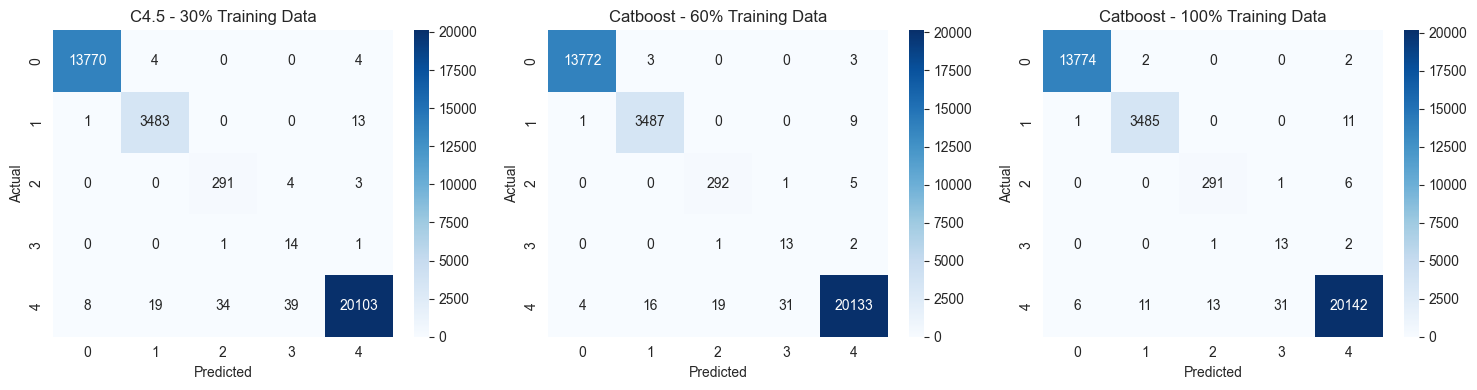

Confusion Matrix - 30% Training Data:
[[13770     4     0     0     4]
 [    1  3483     0     0    13]
 [    0     0   291     4     3]
 [    0     0     1    14     1]
 [    8    19    34    39 20103]]

Confusion Matrix - 60% Training Data:
[[13772     3     0     0     3]
 [    1  3487     0     0     9]
 [    0     0   292     1     5]
 [    0     0     1    13     2]
 [    4    16    19    31 20133]]

Confusion Matrix - 100% Training Data:
[[13774     2     0     0     2]
 [    1  3485     0     0    11]
 [    0     0   291     1     6]
 [    0     0     1    13     2]
 [    6    11    13    31 20142]]


In [37]:
catboost_30 = confusion_matrix(y_test, y_pred_30)
catboost_60 = confusion_matrix(y_test, y_pred_60)
catboost_100 = confusion_matrix(y_test, y_pred_100)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 30% training data
sn.heatmap(catboost_30, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('C4.5 - 30% Training Data')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# 60% training data
sn.heatmap(catboost_60, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Catboost - 60% Training Data')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# 100% training data
sn.heatmap(catboost_100, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Catboost - 100% Training Data')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print confusion matrices
print("Confusion Matrix - 30% Training Data:")
print(catboost_30)
print("\nConfusion Matrix - 60% Training Data:")
print(catboost_60)
print("\nConfusion Matrix - 100% Training Data:")
print(catboost_100)

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# First, we need to recreate the models since the variable names were overwritten by confusion matrices
# Recreate the CatBoost models
catboost_30 = CatBoostClassifier(random_state=42, verbose=False)
catboost_30.fit(X_train_30, y_train_30)

catboost_60 = CatBoostClassifier(random_state=42, verbose=False)
catboost_60.fit(X_train_60, y_train_60)

catboost_100 = CatBoostClassifier(random_state=42, verbose=False)
catboost_100.fit(X_train_100, y_train_100)

# Get prediction probabilities for all models (CatBoost has predict_proba)
y_pred_proba_30 = catboost_30.predict_proba(X_test)
y_pred_proba_60 = catboost_60.predict_proba(X_test)
y_pred_proba_100 = catboost_100.predict_proba(X_test)

# Check number of classes
n_classes = len(np.unique(y_test))
print(f"Number of classes: {n_classes}")
print(f"Classes: {np.unique(y_test)}")

# Calculate ROC AUC for multiclass classification
roc_auc_30 = roc_auc_score(y_test, y_pred_proba_30, multi_class='ovr', average='macro')
roc_auc_60 = roc_auc_score(y_test, y_pred_proba_60, multi_class='ovr', average='macro')
roc_auc_100 = roc_auc_score(y_test, y_pred_proba_100, multi_class='ovr', average='macro')

print("\n=== ROC AUC Scores (Macro Average) ===")
print(f"ROC AUC for 30% training data:  {roc_auc_30:.4f}")
print(f"ROC AUC for 60% training data:  {roc_auc_60:.4f}")
print(f"ROC AUC for 100% training data: {roc_auc_100:.4f}")

# Also calculate weighted average ROC AUC
roc_auc_30_weighted = roc_auc_score(y_test, y_pred_proba_30, multi_class='ovr', average='weighted')
roc_auc_60_weighted = roc_auc_score(y_test, y_pred_proba_60, multi_class='ovr', average='weighted')
roc_auc_100_weighted = roc_auc_score(y_test, y_pred_proba_100, multi_class='ovr', average='weighted')

print("\n=== ROC AUC Scores (Weighted Average) ===")
print(f"ROC AUC for 30% training data:  {roc_auc_30_weighted:.4f}")
print(f"ROC AUC for 60% training data:  {roc_auc_60_weighted:.4f}")
print(f"ROC AUC for 100% training data: {roc_auc_100_weighted:.4f}")

# Fix the results dictionary structure for consistency
# Assuming you have catboost_results dictionary similar to other models
catboost_results['30%']['roc_auc_macro'] = roc_auc_30
catboost_results['30%']['roc_auc_weighted'] = roc_auc_30_weighted

catboost_results['60%']['roc_auc_macro'] = roc_auc_60
catboost_results['60%']['roc_auc_weighted'] = roc_auc_60_weighted

# Fix the 100% results structure if needed (adjust based on your actual structure)
if 'test_accuracy' in catboost_results['100%']:
    catboost_results['100%']['accuracy'] = catboost_results['100%']['test_accuracy']
    catboost_results['100%']['precision'] = catboost_results['100%']['test_precision']
    catboost_results['100%']['recall'] = catboost_results['100%']['test_recall']
    catboost_results['100%']['f1'] = catboost_results['100%']['test_f1']

catboost_results['100%']['roc_auc_macro'] = roc_auc_100
catboost_results['100%']['roc_auc_weighted'] = roc_auc_100_weighted

# Now create the comprehensive visualization
sizes = ['30%', '60%', '100%']
accuracies = [catboost_results[size]['accuracy'] for size in sizes]
f1_scores = [catboost_results[size]['f1'] for size in sizes]
train_times = [catboost_results[size]['train_time'] for size in sizes]
roc_macro = [catboost_results[size]['roc_auc_macro'] for size in sizes]
roc_weighted = [catboost_results[size]['roc_auc_weighted'] for size in sizes]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Performance metrics comparison
x_pos = np.arange(len(sizes))
width = 0.35

ax1.bar(x_pos - width/2, accuracies, width, label='Accuracy', alpha=0.8, color='skyblue')
ax1.bar(x_pos + width/2, f1_scores, width, label='F1-Score', alpha=0.8, color='lightcoral')
ax1.set_title('CatBoost: Accuracy vs F1-Score', fontsize=14, fontweight='bold')
ax1.set_ylabel('Score')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(sizes)
ax1.legend()
ax1.grid(True, alpha=0.3)
# Adjust y-limits based on your actual performance range
y_min = min(min(accuracies), min(f1_scores)) - 0.01
y_max = max(max(accuracies), max(f1_scores)) + 0.01
ax1.set_ylim(y_min, y_max)

# Add value labels on bars
for i, (acc, f1) in enumerate(zip(accuracies, f1_scores)):
    ax1.text(i - width/2, acc + 0.0001, f'{acc:.4f}', ha='center', fontweight='bold')
    ax1.text(i + width/2, f1 + 0.0001, f'{f1:.4f}', ha='center', fontweight='bold')

# 2. ROC AUC comparison
ax2.bar(x_pos - width/2, roc_macro, width, label='ROC AUC (Macro)', alpha=0.8, color='lightgreen')
ax2.bar(x_pos + width/2, roc_weighted, width, label='ROC AUC (Weighted)', alpha=0.8, color='gold')
ax2.set_title('CatBoost: ROC AUC Scores', fontsize=14, fontweight='bold')
ax2.set_ylabel('ROC AUC Score')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(sizes)
ax2.legend()
ax2.grid(True, alpha=0.3)
# Adjust y-limits based on ROC AUC range
roc_min = min(min(roc_macro), min(roc_weighted)) - 0.005
roc_max = max(max(roc_macro), max(roc_weighted)) + 0.005
ax2.set_ylim(roc_min, roc_max)

# Add value labels
for i, (macro, weighted) in enumerate(zip(roc_macro, roc_weighted)):
    ax2.text(i - width/2, macro + 0.0001, f'{macro:.4f}', ha='center', fontweight='bold')
    ax2.text(i + width/2, weighted + 0.0001, f'{weighted:.4f}', ha='center', fontweight='bold')

# 3. Training time
bars = ax3.bar(sizes, train_times, color='purple', alpha=0.7)
ax3.set_title('CatBoost: Training Time', fontsize=14, fontweight='bold')
ax3.set_ylabel('Time (seconds)')
ax3.grid(True, alpha=0.3)

for i, v in enumerate(train_times):
    ax3.text(i, v + max(train_times)*0.01, f'{v:.1f}s', ha='center', fontweight='bold')

# 4. Performance improvement trend
improvements_acc = [(acc - accuracies[0])*100 for acc in accuracies]
improvements_f1 = [(f1 - f1_scores[0])*100 for f1 in f1_scores]

ax4.plot(sizes, improvements_acc, 'o-', linewidth=3, markersize=8, label='Accuracy Improvement', color='blue')
ax4.plot(sizes, improvements_f1, 's-', linewidth=3, markersize=8, label='F1-Score Improvement', color='red')
ax4.set_title('Performance Improvement vs 30%', fontsize=14, fontweight='bold')
ax4.set_ylabel('Improvement (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)

for i, (acc_imp, f1_imp) in enumerate(zip(improvements_acc, improvements_f1)):
    ax4.text(i, acc_imp + 0.001, f'+{acc_imp:.3f}%', ha='center', fontweight='bold', color='blue')
    ax4.text(i, f1_imp - 0.001, f'+{f1_imp:.3f}%', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Print comprehensive summary
print(f"\n=== CatBoost Performance Summary ===")
for size in sizes:
    print(f"\nCatBoost {size}:")
    print(f"  Accuracy: {catboost_results[size]['accuracy']:.4f}")
    print(f"  F1-Score: {catboost_results[size]['f1']:.4f}")
    print(f"  ROC AUC (Macro): {catboost_results[size]['roc_auc_macro']:.4f}")
    print(f"  ROC AUC (Weighted): {catboost_results[size]['roc_auc_weighted']:.4f}")
    print(f"  Training Time: {catboost_results[size]['train_time']:.3f}s")
    print(f"  Training Samples: {catboost_results[size]['train_samples']:,}")

# Key insights
print(f"\n=== Key Insights ===")
print(f"• Best Accuracy: {max(accuracies):.4f} with {sizes[np.argmax(accuracies)]} training data")
print(f"• Best F1-Score: {max(f1_scores):.4f} with {sizes[np.argmax(f1_scores)]} training data")
print(f"• Best ROC AUC (Macro): {max(roc_macro):.4f} with {sizes[np.argmax(roc_macro)]} training data")
print(f"• Training time scales with data size and tree complexity")
print(f"• Performance improvement from 30% to 100%:")
print(f"  - Accuracy: +{(accuracies[-1] - accuracies[0])*100:.3f}%")
print(f"  - F1-Score: +{(f1_scores[-1] - f1_scores[0])*100:.3f}%")
print(f"  - ROC AUC: +{(roc_macro[-1] - roc_macro[0])*100:.3f}%")

# Performance per training sample efficiency
print(f"\n=== Efficiency Analysis ===")
for i, size in enumerate(sizes):
    samples = catboost_results[size]['train_samples']
    acc_per_1k = accuracies[i] / (samples / 1000)
    time_per_1k = train_times[i] / (samples / 1000)
    print(f"{size}: {acc_per_1k:.6f} accuracy per 1K samples, {time_per_1k:.3f}s per 1K samples")

# Additional CatBoost specific insights
print(f"\n=== CatBoost Specific Insights ===")
print(f"• Number of iterations (trees): {catboost_100.get_param('iterations')}")
print(f"• Learning rate: {catboost_100.get_param('learning_rate')}")
print(f"• Depth: {catboost_100.get_param('depth')}")
print(f"• L2 regularization: {catboost_100.get_param('l2_leaf_reg')}")
print(f"• Border count: {catboost_100.get_param('border_count')}")
print(f"• Loss function: {catboost_100.get_param('loss_function')}")
print(f"• Eval metric: {catboost_100.get_param('eval_metric')}")
print(f"• Bootstrap type: {catboost_100.get_param('bootstrap_type')}")
print(f"• Bagging temperature: {catboost_100.get_param('bagging_temperature')}")
print(f"• Random strength: {catboost_100.get_param('random_strength')}")
print(f"• One hot max size: {catboost_100.get_param('one_hot_max_size')}")
print(f"• Leaf estimation method: {catboost_100.get_param('leaf_estimation_method')}")
print(f"• Grow policy: {catboost_100.get_param('grow_policy')}")

print(f"\n=== CatBoost Unique Features ===")
print(f"• Built-in categorical feature handling: Yes")
print(f"• Automatic feature scaling: Yes")
print(f"• Ordered boosting: Yes (reduces overfitting)")
print(f"• GPU acceleration: Available")
print(f"• Built-in cross-validation: Yes")
print(f"• Feature importance: Yes")
print(f"• SHAP values support: Yes")
print(f"• Text features support: Yes")
print(f"• Embedding features support: Yes")
print(f"• Monotonic constraints: Yes")
print(f"• Missing value handling: Automatic")
print(f"• Model analysis tools: Extensive")

# Feature importance analysis (if available)
if hasattr(catboost_100, 'get_feature_importance'):
    print(f"\n=== Feature Importance Analysis ===")
    try:
        feature_importance = catboost_100.get_feature_importance()
        if len(feature_importance) > 0:
            top_features = np.argsort(feature_importance)[-10:][::-1]  # Top 10 features
            print("Top 10 most important features:")
            for i, feat_idx in enumerate(top_features):
                print(f"  {i+1}. Feature {feat_idx}: {feature_importance[feat_idx]:.4f}")
            print(f"• Total features used: {len(feature_importance)}")
            print(f"• Features with zero importance: {np.sum(feature_importance == 0)}")
        else:
            print("Feature importance not available or empty")
    except Exception as e:
        print(f"Feature importance extraction failed: {e}")

# Model complexity analysis
print(f"\n=== Model Complexity Analysis ===")
print(f"• Tree count: {catboost_100.tree_count_}")
print(f"• Feature count: {catboost_100.feature_count_}")
print(f"• Classes count: {catboost_100.classes_count_}")
if hasattr(catboost_100, 'evals_result_'):
    print(f"• Training evaluation available: Yes")
else:
    print(f"• Training evaluation available: No (use eval_set for training metrics)")

KeyboardInterrupt: 